In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
from pandas.api.types import is_numeric_dtype

In [3]:
st_mat = pd.read_csv('studentmat.csv')
st_por = pd.read_csv('C:/Users/hp/Desktop/dataset/studentpor.csv')
pd.set_option('max_columns', None)

In [49]:
st_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


# Some grouping with visualization

In [146]:
st_mat.groupby('school').mean()['G3']

school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64

In [147]:
st_por.groupby('school').mean()['G3']

school
GP    12.576832
MS    10.650442
Name: G3, dtype: float64

In [157]:
st_mat[st_mat['reason'] == 'reputation'].groupby('school').mean()[]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,study/free,is_teacher
school,,,,,,,,,,,,,,,,,,
GP,16.59,2.94,2.62,1.37,2.33,0.25,3.95,3.14,3.04,1.3,2.12,3.25,6.72,11.49,11.31,11.24,0.881833,0.15
MS,17.40,3.00,2.40,2.20,1.80,0.20,3.80,3.40,3.00,1.4,2.00,2.60,5.20,10.80,10.20,9.20,0.580000,0.20


<AxesSubplot:xlabel='is_teacher'>

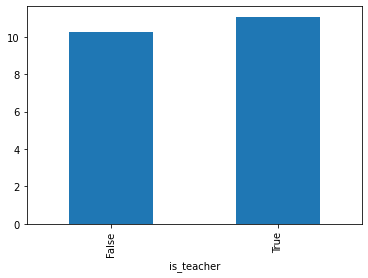

In [145]:
st_mat['is_teacher']  = (st_mat['Fjob'] == 'teacher') | (st_mat['Mjob'] == 'teacher')
st_mat.groupby('is_teacher').mean()['G3'].plot.bar()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,study/free
paid,,,,,,,,,,,,,,,,,
no,16.738318,2.588785,2.434579,1.490654,1.906542,0.462617,3.943925,3.294393,3.098131,1.429907,2.219626,3.654206,5.654206,10.789720,10.350467,9.985981,0.682944
yes,16.646409,2.939227,2.624309,1.397790,2.187845,0.182320,3.944751,3.165746,3.121547,1.541436,2.375691,3.436464,5.773481,11.049724,11.143646,10.922652,0.805249


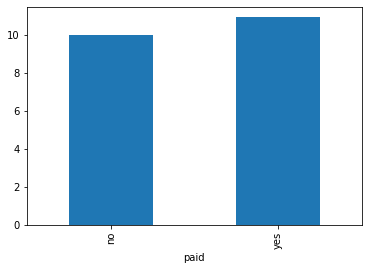

In [133]:
st_mat.groupby('paid').mean()['G3'].plot(kind = 'bar')
st_mat.groupby('paid').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,study/free
nursery,,,,,,,,,,,,,,,,,
no,16.913580,2.333333,2.185185,1.493827,1.901235,0.481481,3.950617,3.283951,3.098765,1.629630,2.543210,3.604938,5.407407,10.456790,10.209877,9.950617,0.670576
yes,16.640127,2.856688,2.608280,1.436306,2.070064,0.296178,3.942675,3.222930,3.111465,1.442675,2.226115,3.541401,5.786624,11.025478,10.843949,10.535032,0.756635


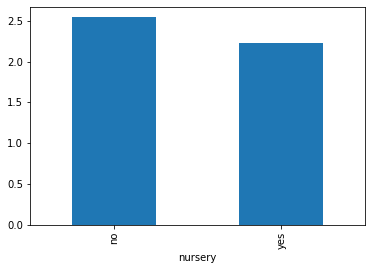

In [132]:
st_mat.groupby('nursery').mean()['Walc'].plot(kind = 'bar')
st_mat.groupby('nursery').mean()

In [128]:
st_mat['study/free'] = (st_mat['studytime']/st_mat['freetime'])
st_mat.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,study/free
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.009562
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,-0.006490
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,-0.049741
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142,-0.038081
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.652873
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415,-0.086935
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363,-0.076636
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307,-0.662785
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791,-0.218837
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660,-0.205927


In [82]:
st_mat.groupby('address').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
address,,,,,,,,,,,,,,,,
R,17.045455,2.465909,2.375000,1.875000,2.068182,0.443182,3.920455,3.170455,2.965909,1.636364,2.534091,3.659091,6.125000,10.477273,9.829545,9.511364
U,16.596091,2.830619,2.563518,1.325733,2.026059,0.302932,3.951140,3.254072,3.149837,1.436482,2.221498,3.524430,5.589577,11.032573,10.967427,10.674267


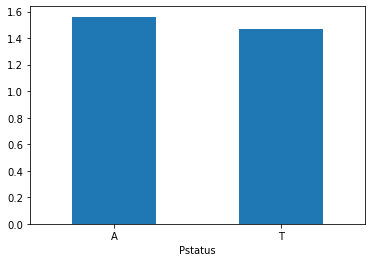

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Pstatus,,,,,,,,,,,,,,,,
A,16.585366,3.146341,2.804878,1.390244,1.975610,0.341463,3.878049,3.121951,3.097561,1.560976,2.268293,3.463415,8.878049,11.073171,11.170732,11.195122
T,16.709040,2.703390,2.488701,1.454802,2.042373,0.333333,3.951977,3.248588,3.110169,1.471751,2.293785,3.564972,5.341808,10.889831,10.661017,10.324859


In [98]:
st_mat.groupby('Pstatus').mean()['Dalc'].plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()
st_mat.groupby('Pstatus').mean()

In [94]:
st_mat[['G1', 'G2', 'G3']].mean()

G1    10.908861
G2    10.713924
G3    10.415190
dtype: float64

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
famsize,,,,,,,,,,,,,,,,
GT3,16.66548,2.779359,2.562278,1.419929,2.074733,0.341637,3.957295,3.224199,3.092527,1.423488,2.206406,3.580071,5.526690,10.758007,10.519573,10.177936
LE3,16.77193,2.675439,2.421053,1.517544,1.938596,0.315789,3.912281,3.263158,3.149123,1.622807,2.500000,3.491228,6.157895,11.280702,11.192982,11.000000


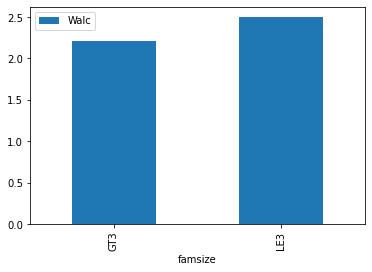

In [110]:
st_mat.groupby('famsize').mean()[['Walc']].plot(kind = 'bar')
st_mat.groupby('famsize').mean()

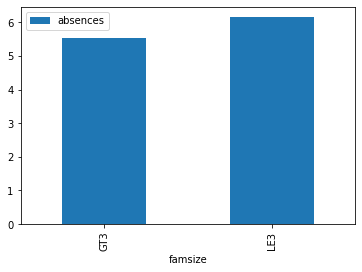

In [116]:
st_mat.groupby('famsize').mean()[['absences']].plot(kind = 'bar')
plt.show()

# Dropping unnecessary columns

In [4]:
st_mat1 = st_mat.drop(['school', 'reason'], axis = 1)
st_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [81]:
st_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [22]:
def only_numeric(df):
    numeric_cols = []
    for a in range(33):
        if is_numeric_dtype(df.iloc[0, a]):
            numeric_cols.append(a)
    return(df.iloc[:, numeric_cols])
print(only_numeric(st_mat))

    sex  age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     F   18     4     4           2          2         0       4         3   
1     F   17     1     1           1          2         0       5         3   
2     F   15     1     1           1          2         3       4         3   
3     F   15     4     2           1          3         0       3         2   
4     F   16     3     3           1          2         0       4         3   
..   ..  ...   ...   ...         ...        ...       ...     ...       ...   
390   M   20     2     2           1          2         2       5         5   
391   M   17     3     1           2          1         0       2         4   
392   M   21     1     1           1          1         3       5         5   
393   M   18     3     2           3          1         0       4         4   
394   M   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  G

In [19]:
st_mat_numerical = st_mat1[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]
st_mat_numerical # only numerical columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [23]:
def correl_coef(a, b): # calculating correlation coefficient
    x = st_mat_numerical[a]
    y = st_mat_numerical[b]
    xy = x*y
    x2 = x**2
    y2 = y**2
    r = (x.count()*xy.sum()-x.sum()*y.sum())/(sqrt((x.count()*x2.sum()-x.sum()**2)*(y.count()*y2.sum()-y.sum()**2)))
    return r

# Building a correlation matrix

In [24]:
columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
correl_matrix = []
for col in columns:
    temp = []
    index = columns.index(col)
    for column in columns[:]:
        temp.append(round(correl_coef(col, column), 2))
    correl_matrix.append(temp)
print(correl_matrix)

[[1.0, -0.16, -0.16, 0.07, -0.0, 0.24, 0.05, 0.02, 0.13, 0.13, 0.12, -0.06, 0.18, -0.06, -0.14, -0.16], [-0.16, 1.0, 0.62, -0.17, 0.06, -0.24, -0.0, 0.03, 0.06, 0.02, -0.05, -0.05, 0.1, 0.21, 0.22, 0.22], [-0.16, 0.62, 1.0, -0.16, -0.01, -0.25, -0.0, -0.01, 0.04, 0.0, -0.01, 0.01, 0.02, 0.19, 0.16, 0.15], [0.07, -0.17, -0.16, 1.0, -0.1, 0.09, -0.02, -0.02, 0.03, 0.14, 0.13, 0.01, -0.01, -0.09, -0.15, -0.12], [-0.0, 0.06, -0.01, -0.1, 1.0, -0.17, 0.04, -0.14, -0.06, -0.2, -0.25, -0.08, -0.06, 0.16, 0.14, 0.1], [0.24, -0.24, -0.25, 0.09, -0.17, 1.0, -0.04, 0.09, 0.12, 0.14, 0.14, 0.07, 0.06, -0.35, -0.36, -0.36], [0.05, -0.0, -0.0, -0.02, 0.04, -0.04, 1.0, 0.15, 0.06, -0.08, -0.11, 0.09, -0.04, 0.02, -0.02, 0.05], [0.02, 0.03, -0.01, -0.02, -0.14, 0.09, 0.15, 1.0, 0.29, 0.21, 0.15, 0.08, -0.06, 0.01, -0.01, 0.01], [0.13, 0.06, 0.04, 0.03, -0.06, 0.12, 0.06, 0.29, 1.0, 0.27, 0.42, -0.01, 0.04, -0.15, -0.16, -0.13], [0.13, 0.02, 0.0, 0.14, -0.2, 0.14, -0.08, 0.21, 0.27, 1.0, 0.65, 0.08, 0.

In [29]:
cor_mat = np.array(correl_matrix)
cor_mat

array([[ 1.  , -0.16, -0.16,  0.07, -0.  ,  0.24,  0.05,  0.02,  0.13,
         0.13,  0.12, -0.06,  0.18, -0.06, -0.14, -0.16],
       [-0.16,  1.  ,  0.62, -0.17,  0.06, -0.24, -0.  ,  0.03,  0.06,
         0.02, -0.05, -0.05,  0.1 ,  0.21,  0.22,  0.22],
       [-0.16,  0.62,  1.  , -0.16, -0.01, -0.25, -0.  , -0.01,  0.04,
         0.  , -0.01,  0.01,  0.02,  0.19,  0.16,  0.15],
       [ 0.07, -0.17, -0.16,  1.  , -0.1 ,  0.09, -0.02, -0.02,  0.03,
         0.14,  0.13,  0.01, -0.01, -0.09, -0.15, -0.12],
       [-0.  ,  0.06, -0.01, -0.1 ,  1.  , -0.17,  0.04, -0.14, -0.06,
        -0.2 , -0.25, -0.08, -0.06,  0.16,  0.14,  0.1 ],
       [ 0.24, -0.24, -0.25,  0.09, -0.17,  1.  , -0.04,  0.09,  0.12,
         0.14,  0.14,  0.07,  0.06, -0.35, -0.36, -0.36],
       [ 0.05, -0.  , -0.  , -0.02,  0.04, -0.04,  1.  ,  0.15,  0.06,
        -0.08, -0.11,  0.09, -0.04,  0.02, -0.02,  0.05],
       [ 0.02,  0.03, -0.01, -0.02, -0.14,  0.09,  0.15,  1.  ,  0.29,
         0.21,  0.15,  0.0

In [118]:
indexes = [] # tried to find pairs of indexes for correlation
rw = 0
for row in cor_mat:
    v = 0
    for value in row:
        temp = []
        if value>=0.25 and value!=1:
            temp.append(rw)
            temp.append(v)
            indexes.append(temp)
        v+=1
    rw+=1
print(indexes)

[[1, 2], [2, 1], [7, 8], [8, 7], [8, 9], [8, 10], [9, 8], [9, 10], [10, 8], [10, 9], [13, 14], [13, 15], [14, 13], [14, 15], [15, 13], [15, 14]]


In [30]:
num_col = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
test = pd.Series(cor_mat[0], index = num_col)
test

age           1.00
Medu         -0.16
Fedu         -0.16
traveltime    0.07
studytime    -0.00
failures      0.24
famrel        0.05
freetime      0.02
goout         0.13
Dalc          0.13
Walc          0.12
health       -0.06
absences      0.18
G1           -0.06
G2           -0.14
G3           -0.16
dtype: float64

In [11]:
correlation_table = pd.DataFrame({'age': [ 1.  , -0.16, -0.16,  0.07, -0.  ,  0.24,  0.05,  0.02,  0.13,
         0.13,  0.12, -0.06,  0.18, -0.06, -0.14, -0.16],
            'Medu': [-0.16,  1.  ,  0.62, -0.17,  0.06, -0.24, -0.  ,  0.03,  0.06,
         0.02, -0.05, -0.05,  0.1 ,  0.21,  0.22,  0.22],
             'Fedu': [-0.16,  0.62,  1.  , -0.16, -0.01, -0.25, -0.  , -0.01,  0.04,
         0.  , -0.01,  0.01,  0.02,  0.19,  0.16,  0.15],
             'traveltime': [ 0.07, -0.17, -0.16,  1.  , -0.1 ,  0.09, -0.02, -0.02,  0.03,
         0.14,  0.13,  0.01, -0.01, -0.09, -0.15, -0.12],
             'studytime': [-0.  ,  0.06, -0.01, -0.1 ,  1.  , -0.17,  0.04, -0.14, -0.06,
        -0.2 , -0.25, -0.08, -0.06,  0.16,  0.14,  0.1 ], 
             'failures': [ 0.24, -0.24, -0.25,  0.09, -0.17,  1.  , -0.04,  0.09,  0.12,
         0.14,  0.14,  0.07,  0.06, -0.35, -0.36, -0.36],
             'famrel': [ 0.05, -0.  , -0.  , -0.02,  0.04, -0.04,  1.  ,  0.15,  0.06,
        -0.08, -0.11,  0.09, -0.04,  0.02, -0.02,  0.05],
             'freetime': [ 0.02,  0.03, -0.01, -0.02, -0.14,  0.09,  0.15,  1.  ,  0.29,
         0.21,  0.15,  0.08, -0.06,  0.01, -0.01,  0.01],
             'goout': [ 0.13,  0.06,  0.04,  0.03, -0.06,  0.12,  0.06,  0.29,  1.  ,
         0.27,  0.42, -0.01,  0.04, -0.15, -0.16, -0.13],
             'Dalc': [ 0.13,  0.02,  0.  ,  0.14, -0.2 ,  0.14, -0.08,  0.21,  0.27,
         1.  ,  0.65,  0.08,  0.11, -0.09, -0.06, -0.05],
             'Walc': [ 0.12, -0.05, -0.01,  0.13, -0.25,  0.14, -0.11,  0.15,  0.42,
         0.65,  1.  ,  0.09,  0.14, -0.13, -0.08, -0.05],
             'health': [-0.06, -0.05,  0.01,  0.01, -0.08,  0.07,  0.09,  0.08, -0.01,
         0.08,  0.09,  1.  , -0.03, -0.07, -0.1 , -0.06],
             'absences': [ 0.18,  0.1 ,  0.02, -0.01, -0.06,  0.06, -0.04, -0.06,  0.04,
         0.11,  0.14, -0.03,  1.  , -0.03, -0.03,  0.03],
             'G1': [-0.06,  0.21,  0.19, -0.09,  0.16, -0.35,  0.02,  0.01, -0.15,
        -0.09, -0.13, -0.07, -0.03,  1.  ,  0.85,  0.8 ],
             'G2': [-0.14,  0.22,  0.16, -0.15,  0.14, -0.36, -0.02, -0.01, -0.16,
        -0.06, -0.08, -0.1 , -0.03,  0.85,  1.  ,  0.9 ],
             'G3': [-0.16,  0.22,  0.15, -0.12,  0.1 , -0.36,  0.05,  0.01, -0.13,
        -0.05, -0.05, -0.06,  0.03,  0.8 ,  0.9 ,  1.  ]}, index = num_col)
correlation_table

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.00,-0.16,-0.16,0.07,-0.00,0.24,0.05,0.02,0.13,0.13,0.12,-0.06,0.18,-0.06,-0.14,-0.16
Medu,-0.16,1.00,0.62,-0.17,0.06,-0.24,-0.00,0.03,0.06,0.02,-0.05,-0.05,0.10,0.21,0.22,0.22
Fedu,-0.16,0.62,1.00,-0.16,-0.01,-0.25,-0.00,-0.01,0.04,0.00,-0.01,0.01,0.02,0.19,0.16,0.15
traveltime,0.07,-0.17,-0.16,1.00,-0.10,0.09,-0.02,-0.02,0.03,0.14,0.13,0.01,-0.01,-0.09,-0.15,-0.12
studytime,-0.00,0.06,-0.01,-0.10,1.00,-0.17,0.04,-0.14,-0.06,-0.20,-0.25,-0.08,-0.06,0.16,0.14,0.10
failures,0.24,-0.24,-0.25,0.09,-0.17,1.00,-0.04,0.09,0.12,0.14,0.14,0.07,0.06,-0.35,-0.36,-0.36
famrel,0.05,-0.00,-0.00,-0.02,0.04,-0.04,1.00,0.15,0.06,-0.08,-0.11,0.09,-0.04,0.02,-0.02,0.05
freetime,0.02,0.03,-0.01,-0.02,-0.14,0.09,0.15,1.00,0.29,0.21,0.15,0.08,-0.06,0.01,-0.01,0.01
goout,0.13,0.06,0.04,0.03,-0.06,0.12,0.06,0.29,1.00,0.27,0.42,-0.01,0.04,-0.15,-0.16,-0.13
Dalc,0.13,0.02,0.00,0.14,-0.20,0.14,-0.08,0.21,0.27,1.00,0.65,0.08,0.11,-0.09,-0.06,-0.05


# Some plotting

<AxesSubplot:xlabel='Fedu', ylabel='Medu'>

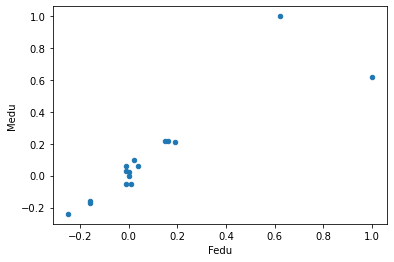

In [76]:
correlation_table[['Fedu', 'Medu']].plot.scatter(x = 'Fedu', y = 'Medu')

<AxesSubplot:xlabel='goout', ylabel='Walc'>

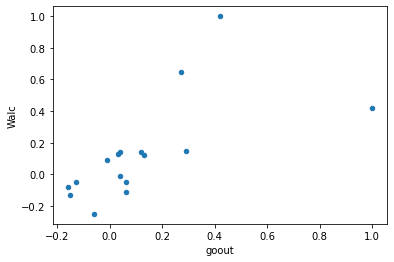

In [74]:
correlation_table[['goout', 'Walc']].plot.scatter(x = 'goout', y = 'Walc')

<AxesSubplot:xlabel='G1', ylabel='G2'>

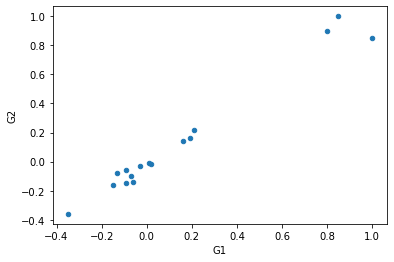

In [45]:
correlation_table[['G1', 'G2']].plot.scatter(x = 'G1', y = 'G2')

<AxesSubplot:xlabel='G2', ylabel='G3'>

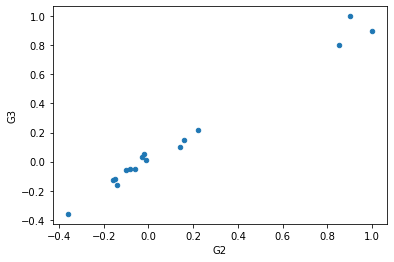

In [47]:
correlation_table[['G2', 'G3']].plot.scatter(x = 'G2', y = 'G3')

<AxesSubplot:xlabel='G1', ylabel='G3'>

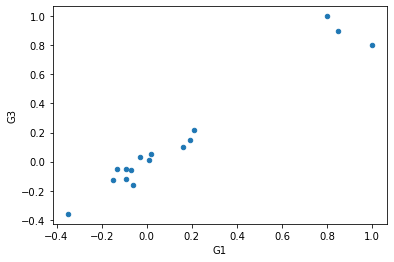

In [48]:
correlation_table[['G1', 'G3']].plot.scatter(x = 'G1', y = 'G3')